(28451, 30)
[1. 1. 1. ... 1. 1. 1.]
Weighted Random Forest Classifier (Bootstrap-FA-WRF):
Accuracy:  0.9437708662800913
Confusion Matrix: 
 [[   0   51    0]
 [   0 5371    0]
 [   0  269    0]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        51
           1       0.94      1.00      0.97      5371
           2       0.00      0.00      0.00       269

    accuracy                           0.94      5691
   macro avg       0.31      0.33      0.32      5691
weighted avg       0.89      0.94      0.92      5691

Axes(0.125,0.11;0.62x0.77)


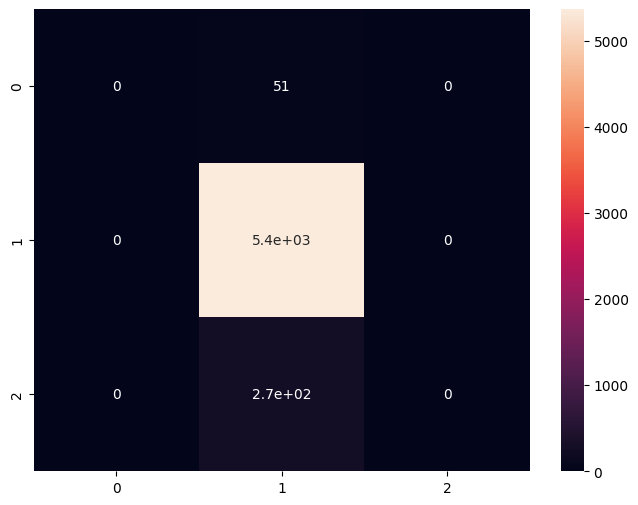

--------------------------------------------------------------


Logistic Regression
Accuracy:  0.9460551748374627
Confusion Matrix: 
 [[  21   30    0]
 [   5 5359    7]
 [   0  265    4]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.81      0.41      0.55        51
           1       0.95      1.00      0.97      5371
           2       0.36      0.01      0.03       269

    accuracy                           0.95      5691
   macro avg       0.71      0.47      0.52      5691
weighted avg       0.92      0.95      0.92      5691

Axes(0.125,0.11;0.62x0.77)


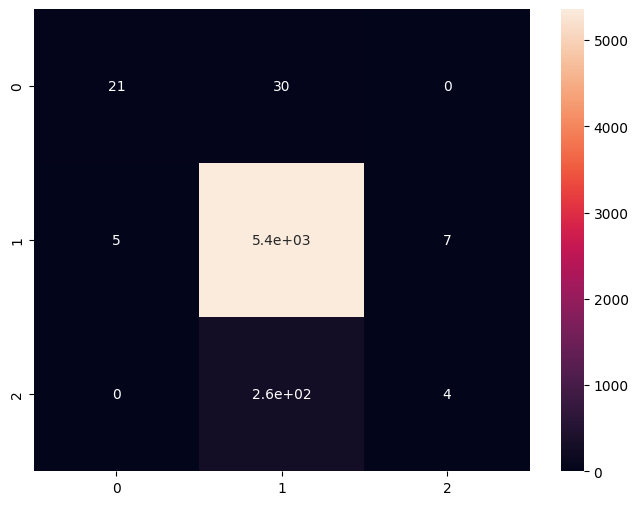

--------------------------------------------------------------


Support Vector Classifier:
Accuracy:  0.949569495694957
Confusion Matrix: 
 [[  36   15    0]
 [   3 5368    0]
 [   0  269    0]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.92      0.71      0.80        51
           1       0.95      1.00      0.97      5371
           2       0.00      0.00      0.00       269

    accuracy                           0.95      5691
   macro avg       0.62      0.57      0.59      5691
weighted avg       0.90      0.95      0.93      5691

Figure(800x600)
Axes(0.125,0.11;0.62x0.77)


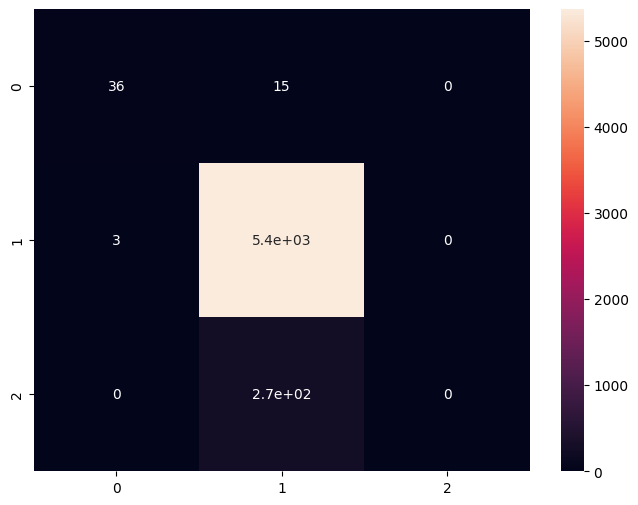

--------------------------------------------------------------



XG Boost Classifier:
Accuracy:  0.9627481989105605
Confusion Matrix: 
 [[  46    5    0]
 [   3 5355   13]
 [   0  191   78]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.94      0.90      0.92        51
           1       0.96      1.00      0.98      5371
           2       0.86      0.29      0.43       269

    accuracy                           0.96      5691
   macro avg       0.92      0.73      0.78      5691
weighted avg       0.96      0.96      0.95      5691

Axes(0.125,0.11;0.62x0.77)


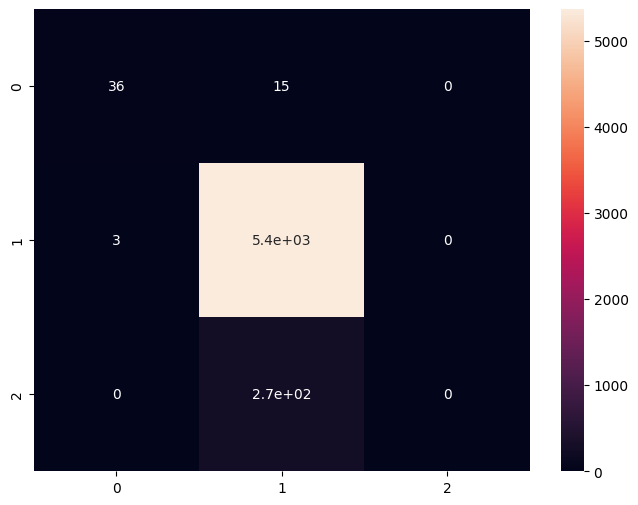

--------------------------------------------------------------


                   Models  Accuracy
0                  FA-WRF     0.944
1     Logistic Regression     0.946
2  Support Vector Machine     0.950
3                 XGBoost     0.963


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.decomposition import FactorAnalysis
import numpy as np
import warnings
warnings.filterwarnings('ignore')


data = pd.read_excel("SJ-sample_severity.xlsx")
df = data.copy()
df = df.sample(frac = 1)
df.reset_index(drop=True)
print(df.shape)

X = df.drop("Severity", axis=1)
y = df["Severity"]


# Use Bootstrap to determine the data extraction standard of the training set
samples = 10
X_boot, y_boot = [], []
for i in range(samples):
    indices = np.random.choice(len(X), len(X), replace=True)
    X_boot.append(X.iloc[indices])
    y_boot.append(y.iloc[indices])


preds = []
for i in range(samples):
    X_train, X_test, y_train, y_test = train_test_split(X_boot[i], y_boot[i], test_size=0.2, random_state=42)

    fa = FactorAnalysis(n_components=20)
    X_train_fa = fa.fit_transform(X_train)
    X_test_fa = fa.transform(X_test)

    weighted_rf = RandomForestClassifier()
    weighted_rf.fit(X_train_fa, y_train)
    pred = weighted_rf.predict(X_test_fa)
    preds.append(pred)

agg_prediction = np.round(np.mean(preds, axis=0))

print(agg_prediction)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

fa = FactorAnalysis(n_components=10)
X_train_fa = fa.fit_transform(X_train)
X_test_fa = fa.transform(X_test)

# Logistic Regression
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)
lr_pred = model_lr.predict(X_test)

# Support Vector Machine
svm = SVC()
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)

# Evaluate the classifiers
print("Weighted Random Forest Classifier (Bootstrap-FA-WRF):")
print("Accuracy: ", accuracy_score(y_test, agg_prediction))
print("Confusion Matrix: \n", confusion_matrix(y_test, agg_prediction))
print("Classification Report: \n", classification_report(y_test, agg_prediction))
plt.figure(figsize=(8,6))
print(sns.heatmap(confusion_matrix(y_test, agg_prediction), annot = True))
plt.show()

print("--------------------------------------------------------------")
print('\n')

print("Logistic Regression")
print("Accuracy: ", accuracy_score(y_test, lr_pred))
print("Confusion Matrix: \n", confusion_matrix(y_test, lr_pred))
print("Classification Report: \n", classification_report(y_test, lr_pred))
plt.figure(figsize=(8,6))
print(sns.heatmap(confusion_matrix(y_test, lr_pred), annot = True))
plt.show()

print("--------------------------------------------------------------")
print('\n')

print("Support Vector Classifier:")
print("Accuracy: ", accuracy_score(y_test, svm_pred))
print("Confusion Matrix: \n", confusion_matrix(y_test, svm_pred))
print("Classification Report: \n", classification_report(y_test, svm_pred))
print(plt.figure(figsize=(8,6)))
print(sns.heatmap(confusion_matrix(y_test, svm_pred), annot = True))
plt.show()



print("--------------------------------------------------------------")
print('\n')

# Train XG Boost Classifier on the original training set
xgb = XGBClassifier()
xgb.fit(X_train_fa, y_train)
xgb_pred = xgb.predict(X_test_fa)

print("\nXG Boost Classifier:")
print("Accuracy: ", accuracy_score(y_test, xgb_pred))
print("Confusion Matrix: \n", confusion_matrix(y_test, xgb_pred))
print("Classification Report: \n", classification_report(y_test, xgb_pred))
plt.figure(figsize=(8,6))
print(sns.heatmap(confusion_matrix(y_test, svm_pred), annot = True))
plt.show()

print("--------------------------------------------------------------")
print('\n')


eval_df = pd.DataFrame()
Models = ['FA-WRF', 'Logistic Regression','Support Vector Machine','XGBoost',]
Accuracy = [round(accuracy_score(y_test, agg_prediction),3),round(accuracy_score(y_test, lr_pred),3) ,round(accuracy_score(y_test, svm_pred),3), round(accuracy_score(y_test, xgb_pred),3) ]
eval_df['Models'] = Models
eval_df['Accuracy'] = Accuracy
print(eval_df)
